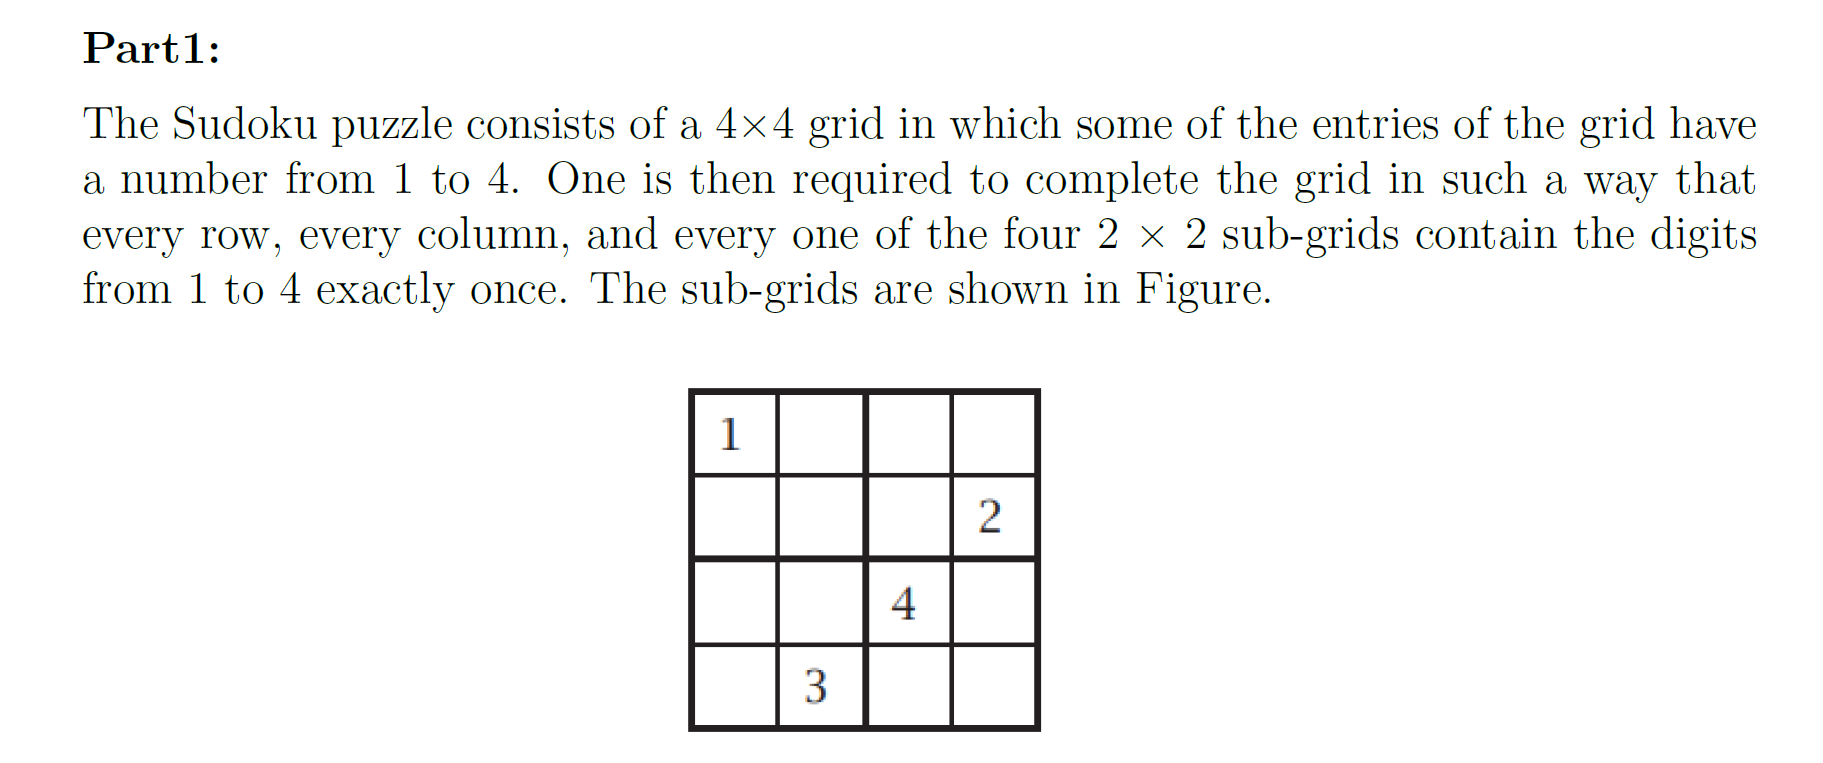

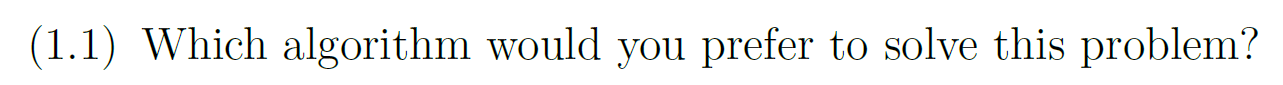

## Solving a Sudoku Puzzle with the Backtracking Algorithm

To solve a Sudoku puzzle with graph theory, especially a smaller 4x4 grid as shown in the image, a common and effective algorithm would be the backtracking algorithm. This algorithm falls under the category of depth-first search algorithms and can be thought of as a brute force approach that is improved with some smart decision-making.

### Steps of the Backtracking Algorithm in Sudoku:

1. **Choose an Empty Cell**: Start with an empty cell and attempt to assign a number to it.
2. **Check Constraints**: Ensure that the same number is not present in the current row, column, or 2x2 subgrid.
3. **Assign a Number**: If the number assignment does not violate the Sudoku constraints, move on to the next empty cell.
4. **Backtrack if Necessary**: If it turns out that a number cannot be assigned to any cell without a conflict, backtrack to the previous cell and try a different number.
5. **Repeat**: Continue this process until the puzzle is solved or until you determine that the puzzle cannot be solved.

The backtracking algorithm is exhaustive and will find a solution if one exists, given that it will explore all possible combinations of number assignments. However, it does so intelligently by only pursuing sequences that adhere to the constraints of the puzzle.


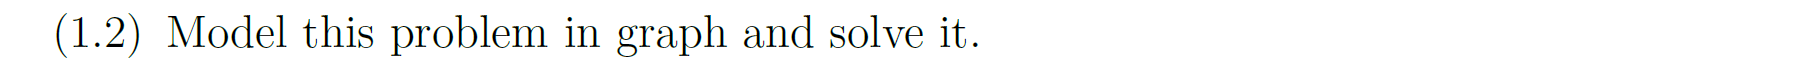

## Graph Theory Approach to Solving Sudoku

To solve a Sudoku puzzle using graph theory, we can treat it as a graph coloring problem. Here's a high-level overview of how you could approach this:

### 1. Graph Representation:
Each cell in the Sudoku grid can be represented as a vertex in the graph. There will be a total of 4x4 = 16 vertices.

### 2. Edges:
Edges are added between vertices that cannot have the same number according to the Sudoku rules. This means:
- Vertices representing cells in the same row are connected.
- Vertices representing cells in the same column are connected.
- Vertices representing cells in the same 2x2 block are connected.

### 3. Coloring:
Each number from 1 to 4 represents a different 'color.' The goal is to color the graph (assign numbers to cells) such that no two connected vertices (cells in the same row, column, or block) have the same color (number).

### 4. Algorithm:
We use a backtracking algorithm to try different colorings (number assignments). We start with an empty cell, assign a number (color), and then move to the next empty cell. If we find that no number can be assigned to a cell without violating the Sudoku rules, we backtrack and try a different number in the previous cells.


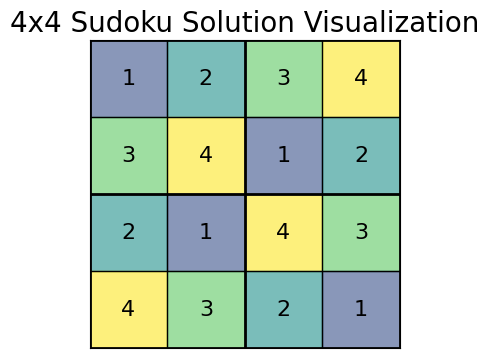

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# New 4x4 sudoku grid
sudoku_grid_4x4 = np.array([
    [1, 0, 0, 0],
    [0, 0, 0, 2],
    [0, 0, 4, 0],
    [0, 3, 0, 0]
])

# Initialize the graph for 4x4 Sudoku
G_4x4 = nx.Graph()

# Add nodes with attributes for 4x4 Sudoku
for i in range(4):
    for j in range(4):
        value = sudoku_grid_4x4[i][j]
        G_4x4.add_node((i, j), value=value)

# Add edges based on Sudoku rules for 4x4 Sudoku
for (i1, j1) in G_4x4.nodes():
    for (i2, j2) in G_4x4.nodes():
        if i1 == i2 or j1 == j2 or (i1//2 == i2//2 and j1//2 == j2//2):
            if (i1, j1) != (i2, j2):
                G_4x4.add_edge((i1, j1), (i2, j2))

# Validation function for 4x4 Sudoku
def is_valid_4x4(node, color, graph, colors):
    for neighbor in graph[node]:
        if colors[neighbor] == color:
            return False
    return True

# Sudoku graph coloring function for 4x4 Sudoku
def sudoku_graph_coloring_4x4(graph, nodes, colors, index=0):
    if index == len(nodes):
        return True

    node = nodes[index]
    if colors[node] != 0:
        return sudoku_graph_coloring_4x4(graph, nodes, colors, index + 1)
    
    for color in range(1, 5):
        if is_valid_4x4(node, color, graph, colors):
            colors[node] = color
            if sudoku_graph_coloring_4x4(graph, nodes, colors, index + 1):
                return True
            colors[node] = 0 # Backtrack if no solution found with this color

    return False

# Initialize colors for 4x4 Sudoku
colors_4x4 = {node: 0 for node in G_4x4.nodes()}
initial_configuration_4x4 = {(i, j): sudoku_grid_4x4[i][j] for i in range(4) for j in range(4) if sudoku_grid_4x4[i][j] != 0}
colors_4x4.update(initial_configuration_4x4)

# Sort nodes for 4x4 Sudoku
sorted_nodes_4x4 = sorted(G_4x4.nodes(), key=lambda node: -len(list(G_4x4.neighbors(node))))

# Solve the 4x4 Sudoku using graph coloring
if sudoku_graph_coloring_4x4(G_4x4, sorted_nodes_4x4, colors_4x4):
    solution_4x4 = [[colors_4x4[(i, j)] for j in range(4)] for i in range(4)]
else:
    solution_4x4 = None

solution_4x4

# Prepare the plot for 4x4 Sudoku solution
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
colors = plt.cm.viridis(np.linspace(0, 1, 5))

# Draw cells and numbers for 4x4 Sudoku
for i in range(4):
    for j in range(4):
        number = solution_4x4[i][j]
        color = colors[number]
        rect = plt.Rectangle((j, 3 - i), 1, 1, color=color, alpha=0.6)
        ax.add_patch(rect)
        ax.text(j + 0.5, 3.5 - i, str(number), va='center', ha='center', fontsize=16)

# Draw grid lines for 4x4 Sudoku
for x in range(5):
    ax.axhline(x, color='black', linewidth=2 if x % 2 == 0 else 1)
    ax.axvline(x, color='black', linewidth=2 if x % 2 == 0 else 1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('4x4 Sudoku Solution Visualization', fontsize=20)

# Show the plot
plt.show()


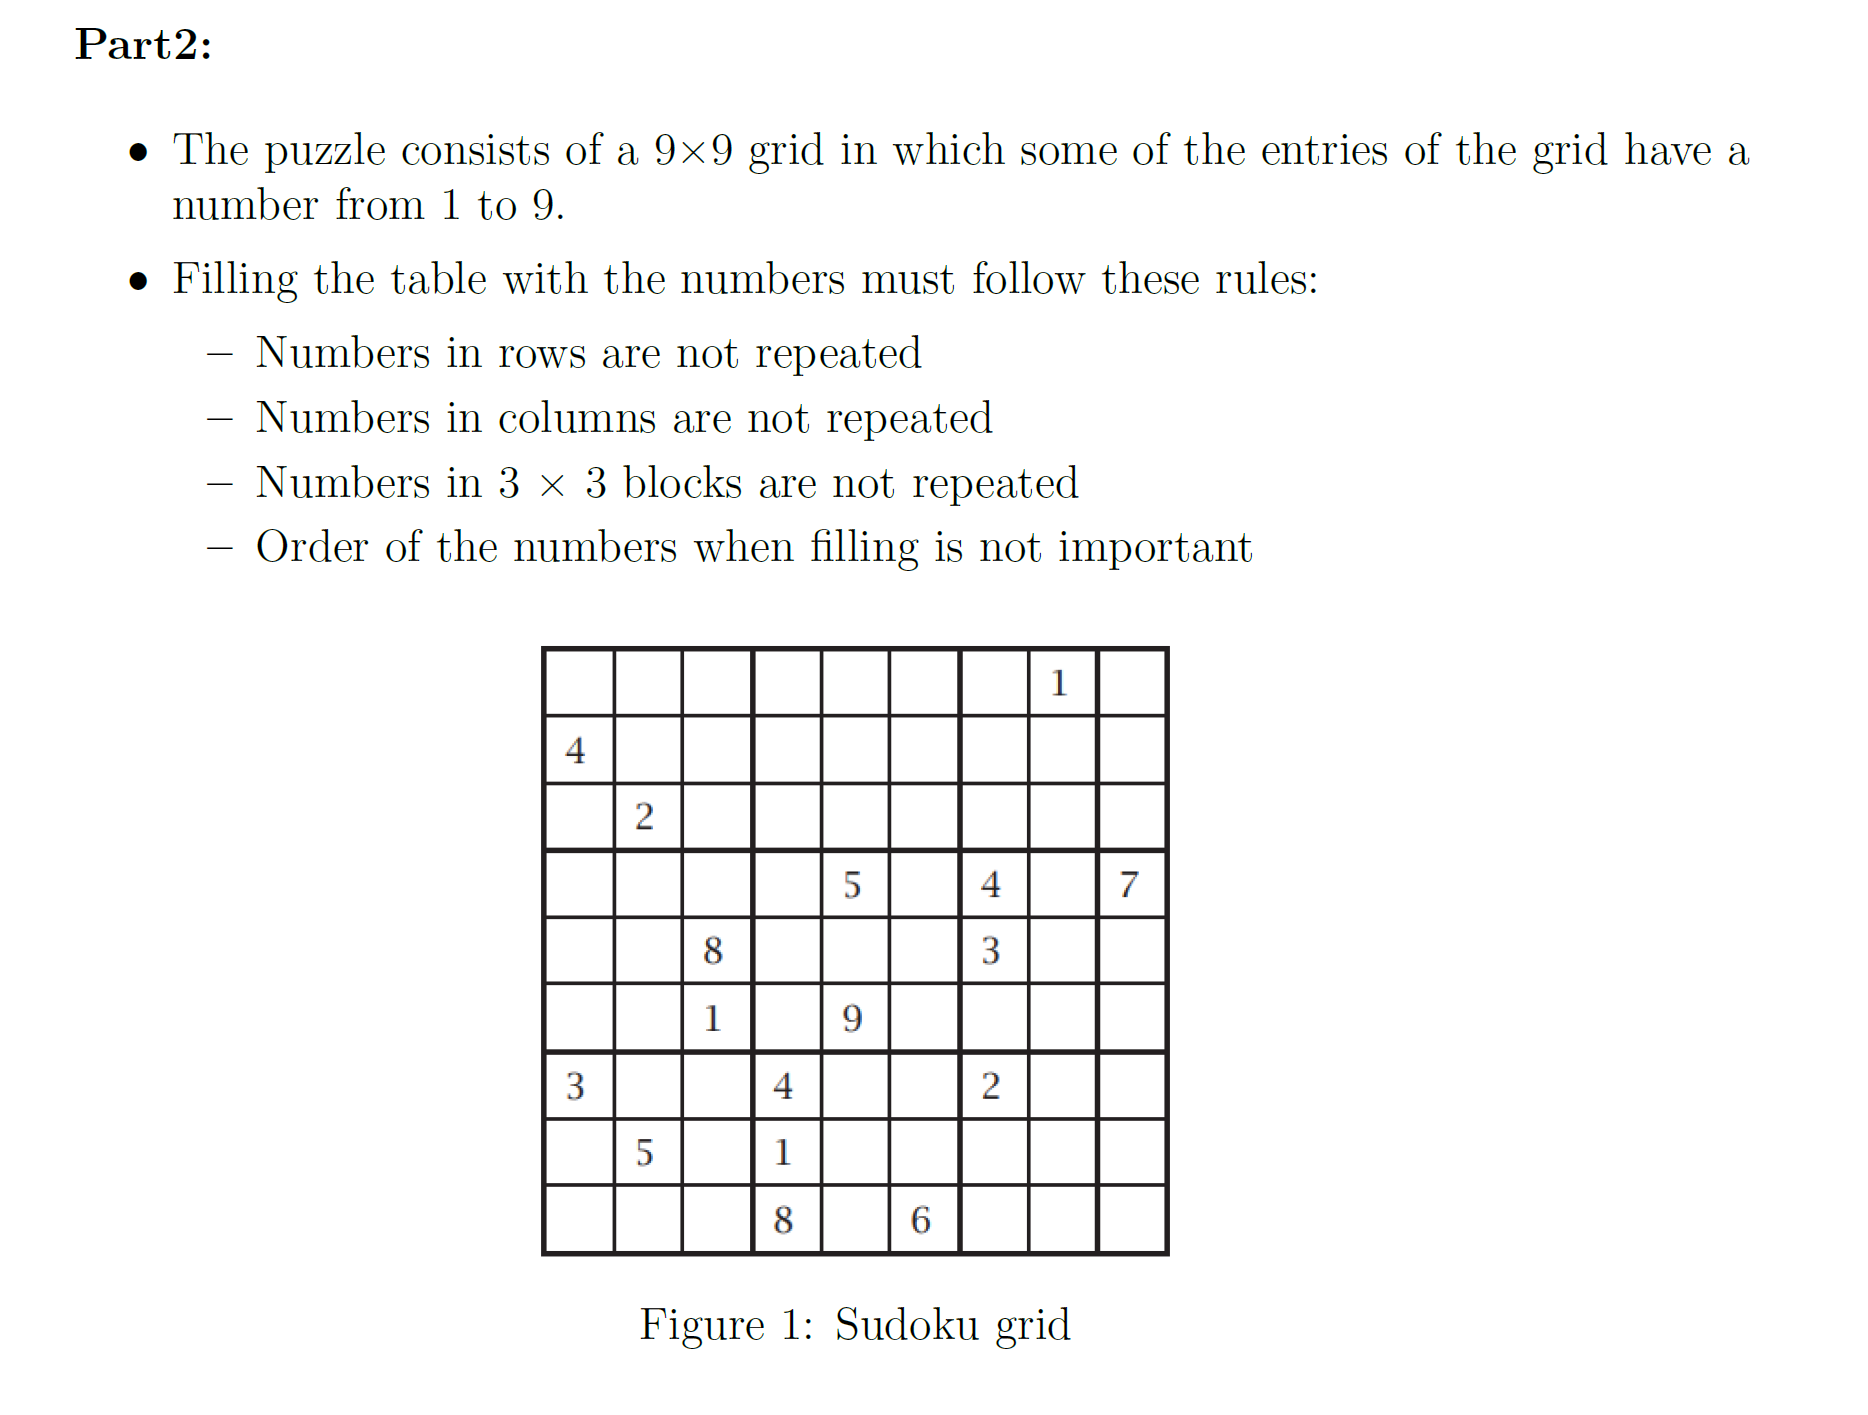

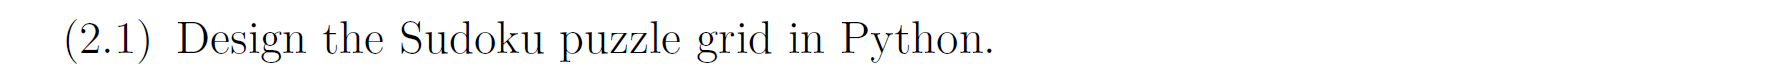

In [11]:
# Zeros represent empty cells
sudoku_grid = [
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [4, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 5, 0, 4, 0, 7],
    [0, 0, 8, 0, 0, 0, 3, 0, 0],
    [0, 0, 1, 0, 9, 0, 0, 0, 0],
    [3, 0, 0, 4, 0, 0, 2, 0, 0],
    [0, 5, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 8, 0, 6, 0, 0, 0]
]

# Convert to a numpy array for easier processing
sudoku_grid_np = np.array(sudoku_grid)

sudoku_grid_np  # Display the grid as a numpy array


array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 4, 0, 7],
       [0, 0, 8, 0, 0, 0, 3, 0, 0],
       [0, 0, 1, 0, 9, 0, 0, 0, 0],
       [3, 0, 0, 4, 0, 0, 2, 0, 0],
       [0, 5, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 8, 0, 6, 0, 0, 0]])

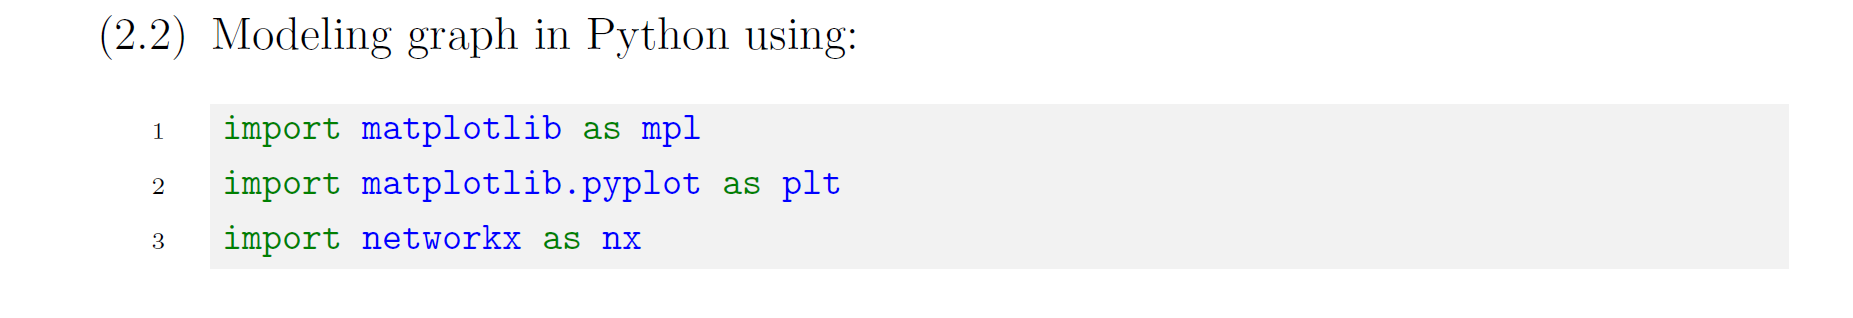

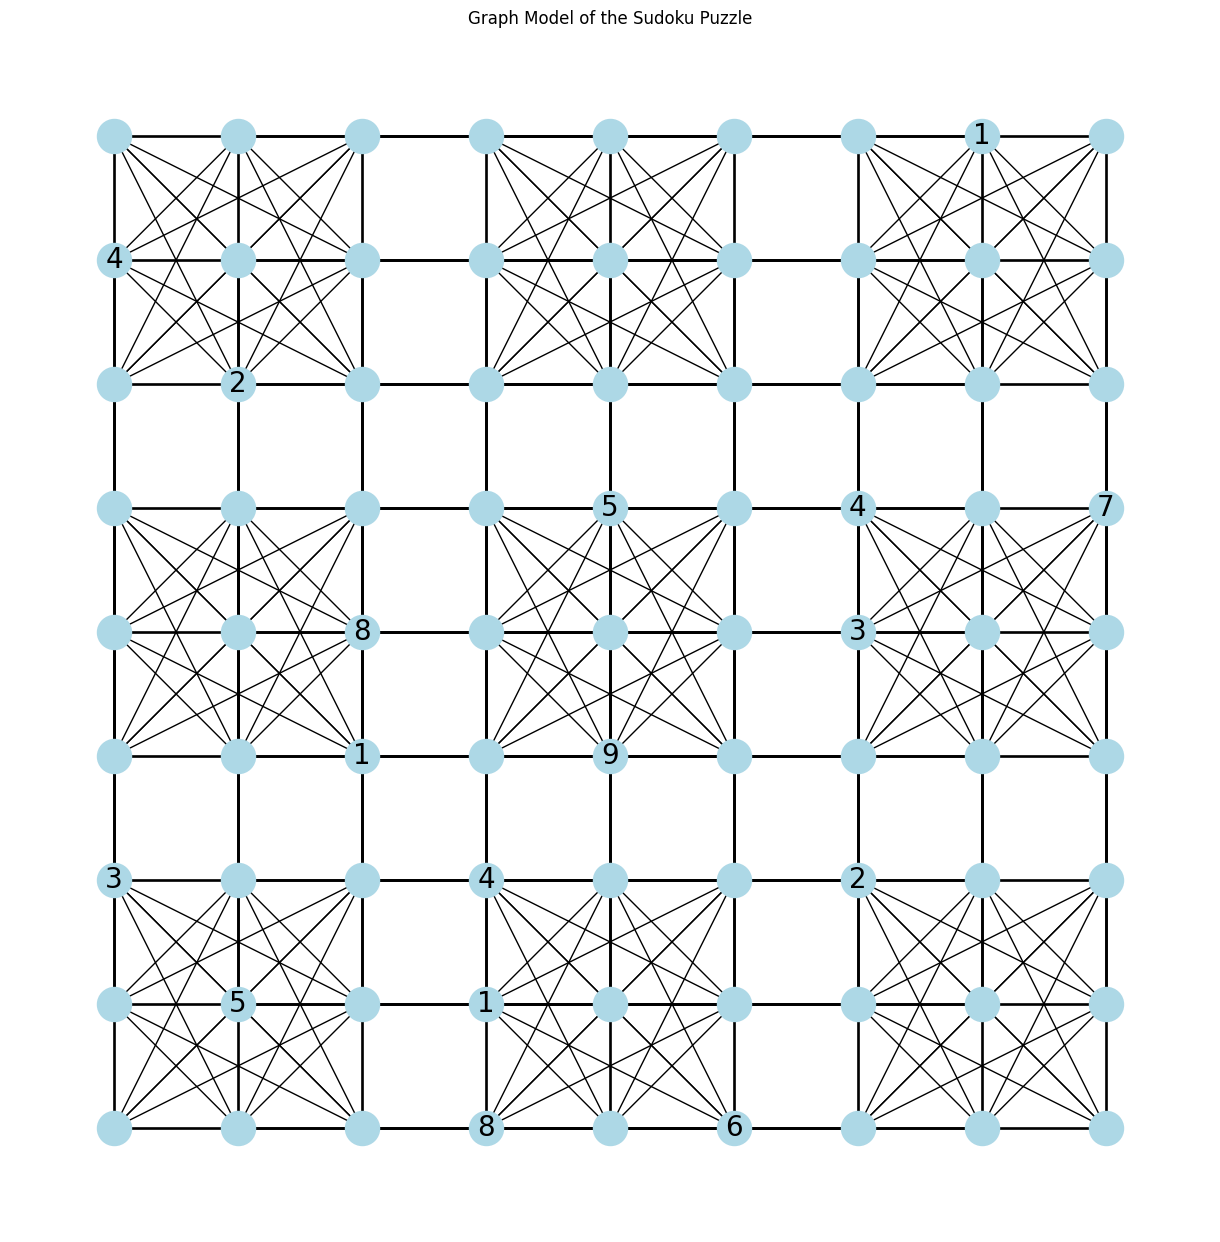

In [12]:
# To model the Sudoku puzzle as a graph, we will use NetworkX along with Matplotlib for visualization.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Add nodes with attributes representing their position and initial value if any
for i in range(9):
    for j in range(9):
        value = sudoku_grid[i][j]
        G.add_node((i, j), value=value)

# Add edges based on Sudoku rules
# Nodes are connected if they are in the same row, column, or 3x3 block
for (i1, j1) in G.nodes():
    for (i2, j2) in G.nodes():
        if i1 == i2 or j1 == j2 or (i1//3 == i2//3 and j1//3 == j2//3):
            if (i1, j1) != (i2, j2):
                G.add_edge((i1, j1), (i2, j2))

# Draw the graph using a grid layout for clarity
pos = {(i, j): (j, -i) for i, j in G.nodes()}  # Position nodes like a Sudoku grid
labels = {n: G.nodes[n]['value'] if G.nodes[n]['value'] != 0 else '' for n in G.nodes()}  # Label non-zero nodes

# Draw the nodes and edges and show the initial values as labels
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=600, node_color='lightblue', font_size=20)
plt.title('Graph Model of the Sudoku Puzzle')
plt.show()


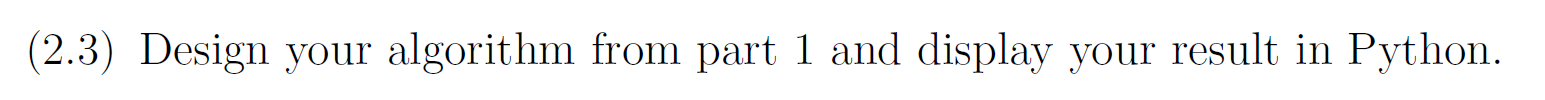

In [13]:
def is_valid_9x9(node, color, graph, colors):
    # Check if adjacent nodes have the same color (number)
    for neighbor in graph[node]:
        if colors[neighbor] == color:
            return False
    return True

def sudoku_graph_coloring_9x9(graph, nodes, colors, index=0):
    if index == len(nodes):
        return True  # All nodes are colored (all cells are filled)

    node = nodes[index]
    if colors[node] != 0:  # Skip the node if it's already colored (given in the puzzle)
        return sudoku_graph_coloring_9x9(graph, nodes, colors, index + 1)
    
    for color in range(1, 10):  # Colors 1 to 9 for 9x9 Sudoku
        if is_valid_9x9(node, color, graph, colors):
            colors[node] = color
            if sudoku_graph_coloring_9x9(graph, nodes, colors, index + 1):
                return True
            colors[node] = 0  # Backtrack

    return False  # No color is valid for this node

# Initialize all colors (numbers) as 0
colors_9x9 = {node: 0 for node in G.nodes()}

# Extract the initial configuration from the Sudoku grid
initial_configuration_9x9 = {(i, j): sudoku_grid[i][j] for i in range(9) for j in range(9) if sudoku_grid[i][j] != 0}

# Apply the initial configuration to the coloring
colors_9x9.update(initial_configuration_9x9)

# Sort nodes by the number of constraints (degree of the node), to improve backtracking efficiency
sorted_nodes = sorted(G.nodes(), key=lambda node: -len(list(G.neighbors(node))))

# Try to solve the Sudoku using graph coloring
if sudoku_graph_coloring_9x9(G, sorted_nodes, colors_9x9):
    solution_9x9 = [[colors_9x9[(i, j)] for j in range(9)] for i in range(9)]
else:
    solution_9x9 = None

solution_9x9


[[6, 9, 3, 7, 8, 4, 5, 1, 2],
 [4, 8, 7, 5, 1, 2, 9, 3, 6],
 [1, 2, 5, 9, 6, 3, 8, 7, 4],
 [9, 3, 2, 6, 5, 1, 4, 8, 7],
 [5, 6, 8, 2, 4, 7, 3, 9, 1],
 [7, 4, 1, 3, 9, 8, 6, 2, 5],
 [3, 1, 9, 4, 7, 5, 2, 6, 8],
 [8, 5, 6, 1, 2, 9, 7, 4, 3],
 [2, 7, 4, 8, 3, 6, 1, 5, 9]]

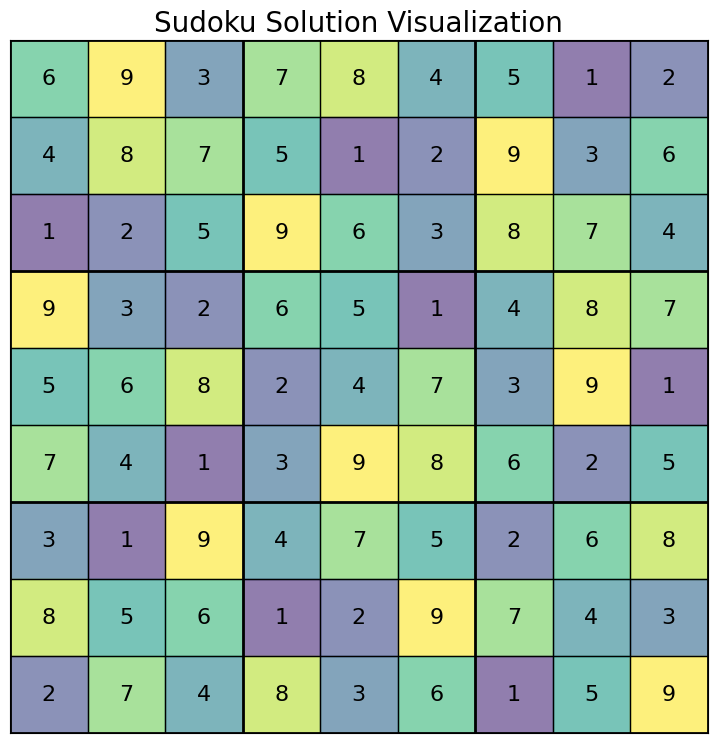

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the plot
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Draw cells and numbers
for i in range(9):
    for j in range(9):
        number = solution_9x9[i][j]
        color = colors[number]
        rect = plt.Rectangle((j, 8 - i), 1, 1, color=color, alpha=0.6)
        ax.add_patch(rect)
        ax.text(j + 0.5, 8.5 - i, str(number), va='center', ha='center', fontsize=16)

# Draw grid lines
for x in range(10):
    ax.axhline(x, color='black', linewidth=2 if x % 3 == 0 else 1)
    ax.axvline(x, color='black', linewidth=2 if x % 3 == 0 else 1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Sudoku Solution Visualization', fontsize=20)

# Show the plot
plt.show()
